In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
x=pd.read_csv("Train.csv" )

In [3]:
print(x.shape)

(23856, 18)


In [4]:
missing =x.isna().sum(axis=0).sort_values(ascending=False)
missing_value_columns = missing[missing>0]
print('They are %s columns with missing values : \n%s ' %(missing_value_columns.count() , [(index , value) for (index , value) in missing_value_columns.iteritems()]))


They are 1 columns with missing values : 
[('X_12', 182)] 


In [5]:
def impute_value(X):
    dataset =X
    dataset['X_12'].fillna(dataset['X_12'].median() , inplace = True)
    return dataset

x = impute_value(x)

In [7]:
missing =x.isna().sum(axis=0).sort_values(ascending=False)
missing_value_columns = missing[missing>0]
print('They are %s columns with missing values : \n%s ' %(missing_value_columns.count() , [(index , value) for (index , value) in missing_value_columns.iteritems()]))


They are 0 columns with missing values : 
[] 


In [8]:
x.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


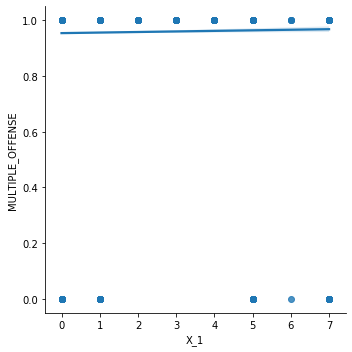

In [9]:
plot = sns.lmplot(x='X_1', y='MULTIPLE_OFFENSE', data=x)

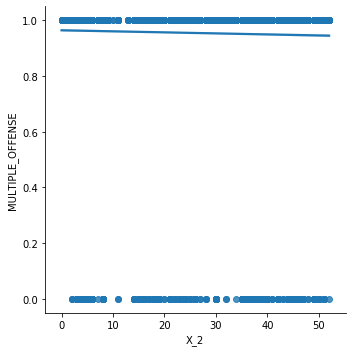

In [10]:
plot = sns.lmplot(x='X_2', y='MULTIPLE_OFFENSE', data=x)

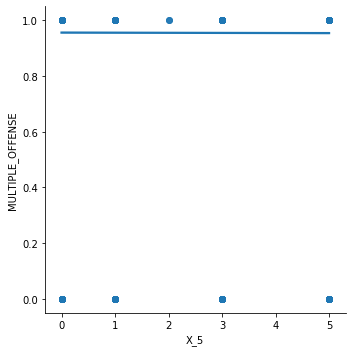

In [11]:
plot = sns.lmplot(x='X_5', y='MULTIPLE_OFFENSE', data=x)

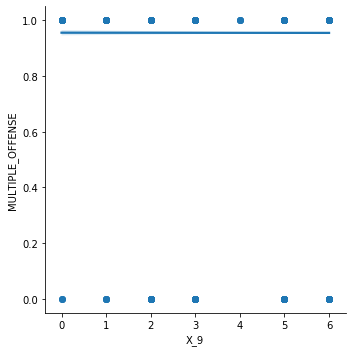

In [12]:
plot = sns.lmplot(x='X_9', y='MULTIPLE_OFFENSE', data=x)

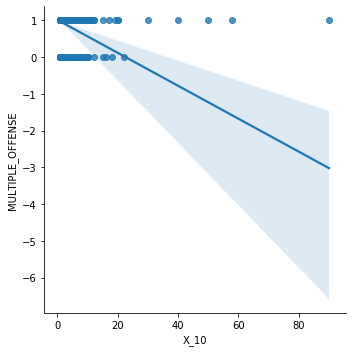

In [13]:
plot = sns.lmplot(x='X_10', y='MULTIPLE_OFFENSE', data=x)

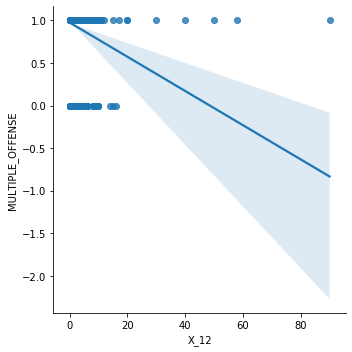

In [14]:
plot = sns.lmplot(x='X_12', y='MULTIPLE_OFFENSE', data=x)

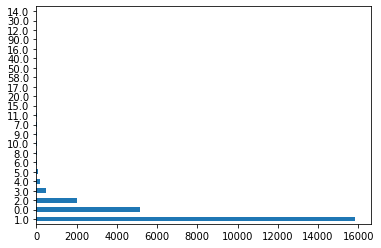

In [29]:
x.X_12.value_counts().plot(kind='barh')

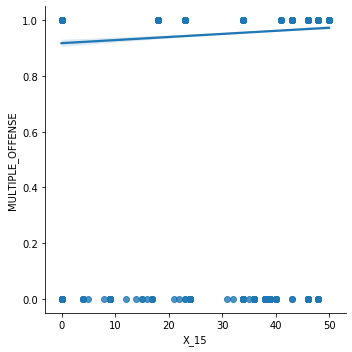

In [15]:
plot = sns.lmplot(x='X_15', y='MULTIPLE_OFFENSE', data=x)

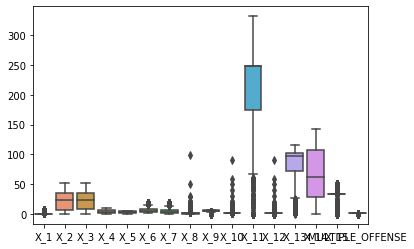

In [16]:
sns.boxplot(data=x)

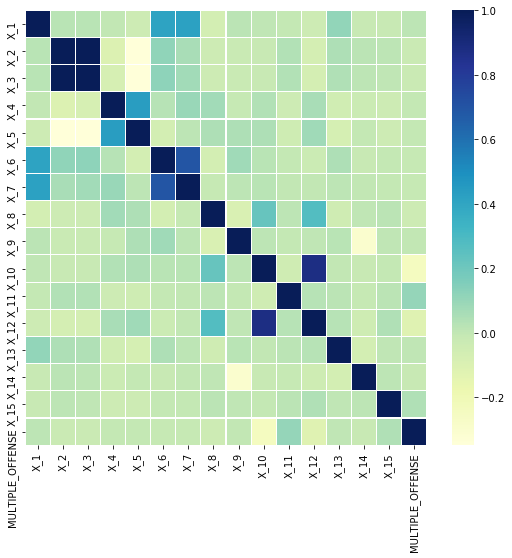

In [25]:
corrmat = x.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

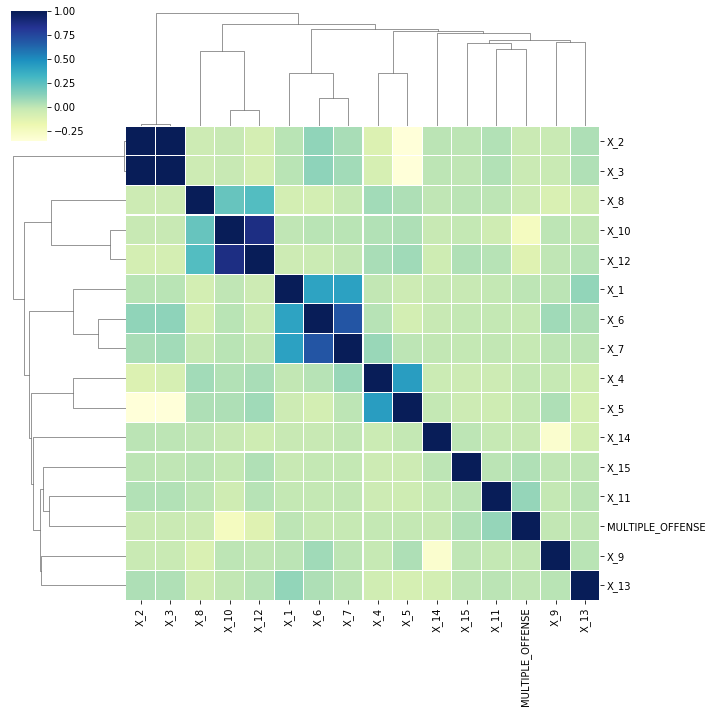

In [18]:
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

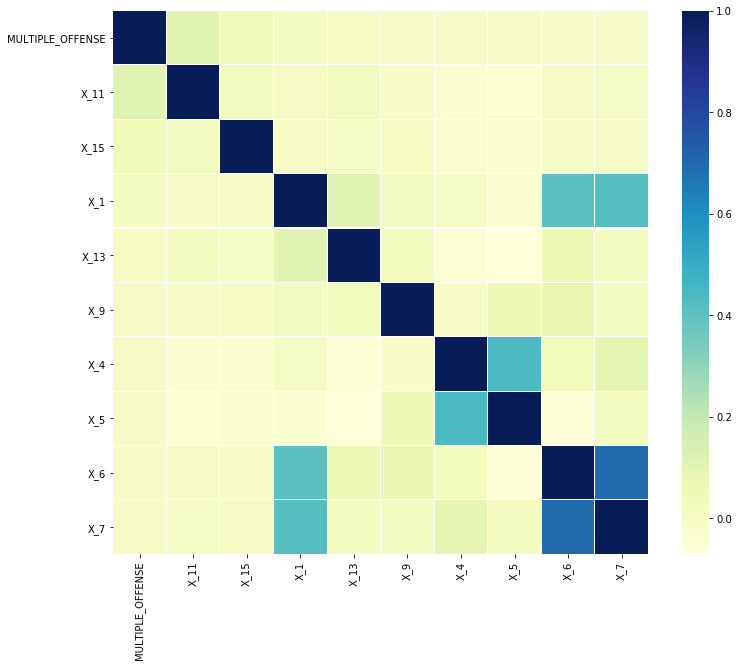

In [27]:
k = 10
  
cols = corrmat.nlargest(k, 'MULTIPLE_OFFENSE')['MULTIPLE_OFFENSE'].index 
  
cm = np.corrcoef(x[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 